### 주피터 노트북으로 판다스 표 만들기

In [ ]:
import pandas as pd
import numpy as np

month_se = pd.Series(['1월','2월','3월','4월'])
income_se = pd.Series([9500,6200,6050,7000])
expenses_se = pd.Series([5040,2350,2300,4800])

df = pd.DataFrame({'월' : month_se, '수익' : income_se, '지출':expenses_se})

display(df)

,월,수익,지출
0,1월,9500,5040
1,2월,6200,2350
2,3월,6050,2300
3,4월,7000,4800


In [4]:
import numpy as np
m_idx = np.argmax(income_se)
print("최대 수익이 발생한 월 :", month_se[m_idx])
print("월 최대 수익 :", income_se.max(), ", 월 평균 수익 :", income_se.mean())

최대 수익이 발생한 월 : 1월
월 최대 수익 : 9500 , 월 평균 수익 : 7187.5


### 위 데이터프레임을 이용해서 1월 부터 4월 까지 매출의 합과 월 지출의 합을 출력

In [ ]:
df_styled = df.style.format({"수익" : "{:,}", "지출" : "{:,}"})
print("동윤이네 상점 수입 합계 : ", f"{income_se.sum():,}원")
print("동윤이네 상점 지출 합계 : ", f"{expenses_se.sum():,}원")
df_styled


동윤이네 상점 수입 합계 :  28,750원
동윤이네 상점 지출 합계 :  14,490원


,월,수익,지출
0,1월,"9,500","5,040"
1,2월,"6,200","2,350"
2,3월,"6,050","2,300"
3,4월,"7,000","4,800"


### 새로운 컬럼 생성하기
* axis = 1은 각 행의함, axis = 0은 각 열의 합
- axis = "columns" == 1, "index" == 0

In [32]:
# 데이터 생성
data = {
    "2007" : [7.71,19.02,10.47,10.87,4.04,2.01],
    "2008" : [7.95, 17.71,8.45,10.83,3.78,2.05],
    "2009" : [11.96,15.00,5.58,7.55,3.45,1.50],
    "2010" : [15.84,16.70,7.60,9.09,4.20,2.25],
    "2011" : [16.33,17.48,8.40,7.88,4.62,2.54]
}

index = ["China", "EU", "US", "Japan", "Korea", "Mexico"]

df = pd.DataFrame(data, index=index)
df["total"] = df.sum(axis=1)
list(df.columns) # 만들어진 데이터를 list로 뽑아낼 수 도 있음
print(df["2007"])

df['total'] = df[['2007', '2008', '2009', '2010', '2011']].sum(axis="columns")
df['mean'] = df[['2007', '2008', '2009', '2010', '2011']].mean(axis="columns")



China      7.71
EU        19.02
US        10.47
Japan     10.87
Korea      4.04
Mexico     2.01
Name: 2007, dtype: float64


### 데이터프레임 함수 사용시 주의사항
- 함수를 사용해 생성된 컬럼은 해당 데이터가 사려저도 이 데이터를 유지함 컬럼을 삭제했을 시에는 해당 데이터를 제외하고 다시 함수를 수행해야함

In [33]:
df.drop('2007', inplace=True, axis="columns")
df['total'] = df[[ '2008', '2009', '2010', '2011']].sum(axis="columns")
df['mean'] = df[[ '2008', '2009', '2010', '2011']].mean(axis="columns")
df

,2008,2009,2010,2011,total,mean
China,7.95,11.96,15.84,16.33,52.08,13.0200
EU,17.71,15.00,16.70,17.48,66.89,16.7225
US,8.45,5.58,7.60,8.40,30.03,7.5075
Japan,10.83,7.55,9.09,7.88,35.35,8.8375
Korea,3.78,3.45,4.20,4.62,16.05,4.0125
Mexico,2.05,1.50,2.25,2.54,8.34,2.0850


### 열의 합을 구하기
- axis = index or 0

In [25]:
df.loc["total"] = df.sum(axis=0)
df

,2008,2009,2010,2011,total,mean
China,7.95,11.96,15.84,16.33,52.08,13.0200
EU,17.71,15.00,16.70,17.48,66.89,16.7225
US,8.45,5.58,7.60,8.40,30.03,7.5075
Japan,10.83,7.55,9.09,7.88,35.35,8.8375
Korea,3.78,3.45,4.20,4.62,16.05,4.0125
Mexico,2.05,1.50,2.25,2.54,8.34,2.0850
total,50.77,45.04,55.68,57.25,208.74,52.1850


### drop 함수의 inplasce 옵션
- False 는 기존 데이터는 건드리지 않고 새로 생성된 값이 리턴됨
- True 는 기존 데이터를 건드림(리턴 값이 없어 새로 변수를 선언해서 생성할 수 없음)

In [34]:
d_df = pd.DataFrame(data=[[10,20,30,40],[50,60,70,80]], columns=['A','B','C','D'])
new_df = d_df.drop("B", axis="columns", inplace=False)
new_df

display(new_df)
display(d_df)

,A,C,D
0,10,30,40
1,50,70,80


,A,B,C,D
0,10,20,30,40
1,50,60,70,80


### read_csv 함수
- csv 파일을 읽어와 데이터프레임을 생성함
- index_col = 0 을 읽어올 csv 파일의 첫번째 열을 데이터 프레임의 인덱스로 사용한다는 의미

In [43]:
# 원격지 CSV  파일 경로 설정
path = "https://github.com/dongupak/DataML/raw/main/csv/vehicle_prod.csv"
# file = path + "weather.csv"

# CSV 파일을 읽어서 데이터프레임으로 만들기 (첫 번째 열을 인덱스로 설정)
df = pd.read_csv(path, index_col=0)

# 데이터 출력
display(df)

df.drop("Mexico", axis="index", inplace=True)
display(df)

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62


In [ ]:
#  데이터의 인덱스를 기준으로 가져오는 여러가지 방법
df.iloc[4]
df.loc['Korea']

2007    4.04
2008    3.78
2009    3.45
2010    4.20
2011    4.62
Name: Korea, dtype: float64

### 인덱서

In [ ]:
# 앞에서 3개 행의 데이터를 가져온 후 컬럼이 2009 인 데이터
df.head(3)['2009']

# iloc 의 차이 인덱싱 차이
df.iloc[[2,4]]
df.iloc[2,4]
df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62


### 판다스의 인코딩
- csv 파일을 읽어올 때 encoding 옵션을 주어야 한글이 한글이 정상적으로 출력되며 에러가 발생하지않음.

In [ ]:
# 원격지 CSV  파일 경로 설정
path = "https://github.com/dongupak/DataML/raw/main/csv/weather.csv"

weather = pd.read_csv(path, index_col=0, encoding="CP949")

weather.head(3)
display(weather)

# shape() 해당 데이터의 행과 열의 수를 튜플로 리턴
print(f'weather 데이터의 shape : {weather.shape}')

weather.describe()
weather.count()

# isna() 결손값을 뽑아내는 함수
missing_data = weather[weather['평균풍속'].isna()]
missing_data



,평균기온,최대풍속,평균풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


weather 데이터의 shape : (3653, 3)


KeyError: '일시'

### 데이터의 정제와 결손값 처리하기
- 결손 데이터 삭제하기
- dropna() 함수의 옵션
- how = any(결손데이터가 하나라도 포함되면 제거 대상)
- how = all(행, 열 전체에 결손데이터가 있으면 제거 대상)
- inplace = False (원본데이터는 유지하고 새로 생성)
- True = (원본데이터를 수정)

In [65]:
new_df = weather.dropna(axis="index", how="any", inplace=False)
new_df.count()

평균기온    3646
최대풍속    3646
평균풍속    3646
dtype: int64

### fillna 함수 이용하여 처리하기
- 결손데이터를 삭제하는 것이 아닌 특정 값으로 대체함

In [ ]:
new_weather = weather.fillna(0, inplace=False)
new_weather.loc['2012-02-11']

new_weather = weather.fillna(weather['평균풍속'].mean(), inplace=False)
new_weather.loc['2012-02-11']

# 평균 풍속의 결손치는 평균 풍속의 평균값으로 넣고
# 최대 풍속의 결손치는 최대 풍속의 평균값으로 넣어보자

max_wind = pd.Series(weather['최대풍속'])
mean_wind = pd.Series(weather['평균풍속'])
max_wind.fillna(max_wind.mean(), inplace=True)
mean_wind.fillna(mean_wind.mean(), inplace=True)
mean_wind.loc['2012-02-11']

new_weather = pd.concat([weather["평균기온"], max_wind, mean_wind], axis=1)
weather.loc['2012-02-11']


평균기온   -0.700000
최대풍속    7.911099
평균풍속    3.936441
Name: 2012-02-11, dtype: float64

### 시계열 자료 분석
- DatetimeIndex 를 활용해 여러가지 패턴의 시계열 자료를 알아서 통일화 하여 사용할수 있게 됨
- 통일화된 패턴은 yyyy-mm-dd로 됨

In [111]:
d_list = ['01/03/2018', '01-03-2018', '2018-01-05', '2018/01/06','2020-05-01']

pd.DatetimeIndex(d_list).month
dt_list = ['01,03,2028 11:12:13', '01-03-2018 11:22:13', '01-04-2019 10:22:24 PM']
pd.DatetimeIndex(dt_list).hour
pd.DatetimeIndex(dt_list).second



Index([13, 13, 24], dtype='int32')

### 위의 weather 를 이용한 DatetimeIndex 예제

,일시,평균기온,최대풍속,평균풍속,month
0,2010-08-01,28.7,8.3,3.4,8
1,2010-08-02,25.2,8.7,3.8,8
2,2010-08-03,22.1,6.3,2.9,8
3,2010-08-04,25.3,6.6,4.2,8
4,2010-08-05,27.2,9.1,5.6,8
...,...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7,7
3649,2020-07-28,21.9,4.5,1.6,7
3650,2020-07-29,21.6,3.2,1.0,7
3651,2020-07-30,22.9,9.7,2.4,7


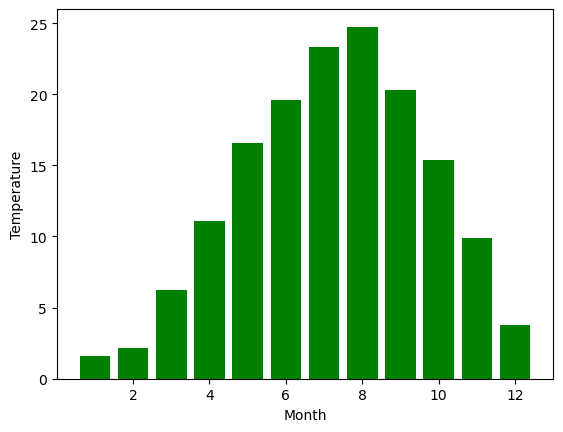

In [ ]:
import matplotlib.pylab as plt

# 원격지 CSV  파일 경로 설정
path = "https://github.com/dongupak/DataML/raw/main/csv/weather.csv"

weather = pd.read_csv(path, encoding="CP949")

# 일시를 가져와 month 컬럼을 추가 하기
# weather['일시'] = pd.DatetimeIndex(weather['일시']).year
weather['month'] = pd.DatetimeIndex(weather['일시']).month

# 월별 평균기온으로 데이터 시각화 하기
monthly = [None for x in range(12)]
monthly_temp = [0 for x in range(12)]
for i in range(12):
    monthly[i] = weather[weather["month"] == i + 1]
    monthly_temp[i] = monthly[i]['평균기온'].mean()
    
months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel("Month")
plt.ylabel("Temperature")   

weather

### 그룹핑과 필터링

In [132]:
path = "https://github.com/dongupak/DataML/raw/main/csv/weather.csv"
import pandas as pd

# 일시를 가져와 month 컬럼을 추가 하기
weather = pd.read_csv(path, encoding="CP949")
weather["month"] = pd.DatetimeIndex(weather["일시"]).month
weather["year"] = pd.DatetimeIndex(weather["일시"]).year

# mean() 은 숫자만 가능하나 일시는 날짜 타입으로 되어있어 불가함
# mean() 함수에 옵션으로 numeric_only = True 만 주면 숫자만 걸러 연산함
monthly_means = weather.groupby("month").mean(numeric_only=True)
yearly_means = weather.groupby("year").mean(numeric_only=True)

monthly_means
yearly_means

,평균기온,최대풍속,평균풍속,month
year,,,,
2010,15.238562,8.205229,4.069281,10.000000
2011,12.073425,8.355616,4.251233,6.526027
2012,11.892896,7.794490,3.863912,6.513661
2013,12.795068,7.859726,3.874795,6.526027
2014,12.844110,7.458904,3.816438,6.526027
2015,13.162466,7.694247,3.799449,6.526027
2016,13.243443,7.963934,3.977869,6.513661
2017,13.111233,8.001370,3.934795,6.526027
2018,13.041644,8.158630,4.085479,6.526027


### 도전문제
- 위의 weather 데이터 프레임을 이용하여 연도별
- 평균기온을 히스토그램으로 출력
- 힌트) 그룹바이 함수와 DatetimeIndex().year를 사용해보자
- 히스토그램은 plt.bar()

<BarContainer object of 11 artists>

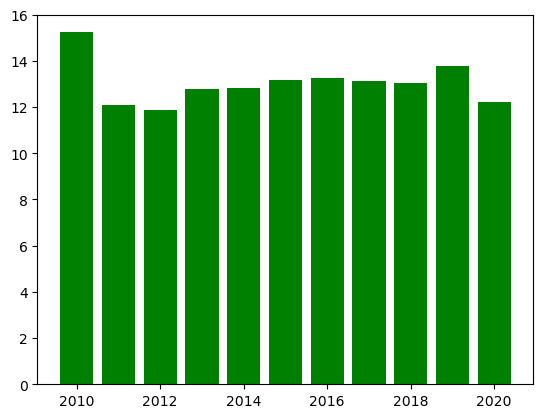

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

path = "https://github.com/dongupak/DataML/raw/main/csv/weather.csv"

# 일시를 가져와 month 컬럼을 추가 하기
weather = pd.read_csv(path, encoding="CP949")
weather["year"] = pd.DatetimeIndex(weather["일시"]).year
yearly_means = weather.groupby("year").mean(numeric_only=True)
plt.bar(list(yearly_means.index), yearly_means["평균기온"], color="green")

### 데이터 구조를 변경하는 pivot()
- 인덱스가 2개 이상인 경우는 pivot()으로는 재구조화 할 수 없으며 pivot_table()을 사용해야 한다.
- 컬럼이 2개 이상인 경우도 pivot_table()을 사용해야한다.

In [134]:
df = pd.DataFrame(
    {
        "상품": ["시계", "반지", "반지", "목걸이", "팔찌"],
        "재질": ["금", "은", "백금", "금", "은"],
        "가격": [500000, 20000, 350000, 300000, 60000],
    }
)
display(df)
new_df = df.pivot(index="상품", columns="재질", values="가격")
display(new_df)
new_df.fillna(0)  # 결손값은 0으로 바꾸기

,상품,재질,가격
0,시계,금,500000
1,반지,은,20000
2,반지,백금,350000
3,목걸이,금,300000
4,팔찌,은,60000


재질,금,백금,은
상품,,,
목걸이,300000.0,NaN,NaN
반지,NaN,350000.0,20000.0
시계,500000.0,NaN,NaN
팔찌,NaN,NaN,60000.0


재질,금,백금,은
상품,,,
목걸이,300000.0,0.0,0.0
반지,0.0,350000.0,20000.0
시계,500000.0,0.0,0.0
팔찌,0.0,0.0,60000.0


### pivot_table() 예시

In [138]:
import pandas as pd

age = [22.0, 35.0, 38.0, 26.0, 35.0]
sex = ["male", "female", "female", "male", "female"]
fare = [7.2500, 71.2833, 7.9250, 53.1000, 8.0500]
dclass = ["Third", "First", "Third", "First", "Third"]
servived = [0, 1, 1, 1, 0]
df = pd.DataFrame(
    {"age": age, "sex": sex, "class": dclass, "fare": fare, "servived": servived}
)

new_df = df.pivot_table(
    index=["class", "sex"],
    columns="servived",
    values=["age", "fare"],
    aggfunc=["mean", "max"],
)
new_df.fillna(0)

mean                        max                     
               age        fare            age        fare         
servived         0     1     0        1     0     1     0        1
class sex                                                         
First female   0.0  35.0  0.00  71.2833   0.0  35.0  0.00  71.2833
      male     0.0  26.0  0.00  53.1000   0.0  26.0  0.00  53.1000
Third female  35.0  38.0  8.05   7.9250  35.0  38.0  8.05   7.9250
      male    22.0   0.0  7.25   0.0000  22.0   0.0  7.25   0.0000

### 두 개의 데이터프레임을 하나로 합치는 concat()
#### concat() 함수의 옵션
- axis = index(행에 붙이기)
- axis = columns(열에 붙이기)
- join = outher(합집합)
- join = inner(교칩합)

In [141]:
df_1 = pd.DataFrame(
    {
        "A": ["a10", "a11", "a12"],
        "B": ["b10", "b11", "b12"],
        "C": ["c10", "c11", "c12"],
    },
    index=["가", "나", "다"],
)

# 두 번째 데이터프레임
df_2 = pd.DataFrame(
    {
        "B": ["b23", "b24", "b25"],
        "C": ["c23", "c24", "c25"],
        "D": ["d23", "d24", "d25"],
    },
    index=["다", "라", "마"],
)

pd.concat([df_1, df_2], axis="index", join="outer")

,A,B,C,D
가,a10,b10,c10,NaN
나,a11,b11,c11,NaN
다,a12,b12,c12,NaN
다,NaN,b23,c23,d23
라,NaN,b24,c24,d24
마,NaN,b25,c25,d25


### merge()
### DataFrame.merge(right, how='inner', on=None)
- right = 현재 데이터프레임과 결합할 데이터프레임
- how = 결합의 방식 'left', 'right', 'inner', 'outer' 가능
- on = 조인 연산을 수행하기 위해 사용할 레이블

In [142]:
print(f"merge 전 df_1\n {df_1}")
print(f"merge 전 df_2\n {df_2}")
print("left outer \n", df_1.merge(df_2, how="left", on="B"))
print("right outer \n", df_1.merge(df_2, how="right", on="B"))
print("full outer \n", df_1.merge(df_2, how="outer", on="B"))
print("inner \n", df_1.merge(df_2, how="inner", on="B"))

merge 전 df_1
      A    B    C
가  a10  b10  c10
나  a11  b11  c11
다  a12  b12  c12
merge 전 df_2
      B    C    D
다  b23  c23  d23
라  b24  c24  d24
마  b25  c25  d25
left outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
right outer 
      A    B  C_x  C_y    D
0  NaN  b23  NaN  c23  d23
1  NaN  b24  NaN  c24  d24
2  NaN  b25  NaN  c25  d25
full outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
3  NaN  b23  NaN  c23  d23
4  NaN  b24  NaN  c24  d24
5  NaN  b25  NaN  c25  d25
inner 
 Empty DataFrame
Columns: [A, B, C_x, C_y, D]
Index: []


#### 중복된 인덱스 제거하기
- left_index, right_indext 를 True로 부여해서 적용함

In [143]:
df_3 = df_1.merge(df_2, how='outer', left_index=True, right_index=True)
df_3

,A,B_x,C_x,B_y,C_y,D
가,a10,b10,c10,NaN,NaN,NaN
나,a11,b11,c11,NaN,NaN,NaN
다,a12,b12,c12,b23,c23,d23
라,NaN,NaN,NaN,b24,c24,d24
마,NaN,NaN,NaN,b25,c25,d25


### CSV읽기/쓰기

In [153]:
df_1 = pd.DataFrame({'address1' : [10,10,10,10,10], 'address2' : [1,1,1,2,2], 'jan' : [413,413,433,164,165]})
df_2 = pd.DataFrame({'address1' : [10,10], 'address2' : [1,3], 'jan' : [9812,352]})

df_3 = df_1.merge(df_2, how='outer')
df_3 = df_1.drop_duplicates() # 중복값 제거하기
df_3

,address1,address2,jan
0,10,1,413
2,10,1,433
3,10,2,164
4,10,2,165
